In [1]:
import pandas as pd
import numpy as np
import seaborn  as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [14]:
plt.rc('font', family='AppleGothic')

In [12]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font_path in font_list:
    font_name = fm.FontProperties(fname=font_path).get_name()
    print(font_name)
    
#font_name = "Microsoft Sans Serif"

#font_path = fm.findfont(fm.FontProperties(family=font_name))

Noto Serif Balinese
Arial Rounded MT Bold
.New York
System Font
Noto Sans Lydian
Al Nile
Noto Sans Warang Citi
Oriya Sangam MN
Trebuchet MS
Raanana
Hiragino Sans
.SF Compact
Mishafi
Noto Sans Old Persian
Microsoft Sans Serif
Apple Symbols
Verdana
Ayuthaya
Mukta Mahee
Noto Sans Modi
Devanagari Sangam MN
Georgia
Kohinoor Devanagari
Georgia
Verdana
Arial Narrow
Farah
Lao Sangam MN
Noto Sans Saurashtra
Kefa
Lucida Grande
New Peninim MT
Marker Felt
STIXNonUnicode
Courier
Noto Sans Egyptian Hieroglyphs
Trebuchet MS
Sathu
Times New Roman
Optima


RuntimeError: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)

## 01. 데이터 전처리

In [24]:
final_df = pd.read_csv('../data/SEOUL.csv')
final_df

,상권_코드_명,상권_코드,기준_년_코드,기준_분기_코드,유사_업종_점포_수,개업_율,폐업_율,주중_매출_비율,주말_매출_비율,남성_매출_비율,...,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,경영_위기_비율
0,DMC(디지털미디어시티),2120098,2022,1,766,0.031353,0.016502,0.882753,0.117247,0.532487,...,0.166844,0.583242,0.249914,72,24,1285,8846.0,318202,3567709.0,0.150943
1,DMC(디지털미디어시티),2120098,2022,2,768,0.042763,0.032895,0.874108,0.125892,0.529133,...,0.175676,0.593012,0.231312,72,24,1285,8846.0,358782,3567709.0,0.207547
2,DMC(디지털미디어시티),2120098,2022,3,774,0.035714,0.027597,0.881428,0.118572,0.526975,...,0.184997,0.587134,0.227869,72,24,1285,8846.0,352688,3567709.0,0.142857
3,DMC(디지털미디어시티),2120098,2022,4,778,0.041935,0.037097,0.868980,0.131020,0.527500,...,0.183274,0.584706,0.232020,72,24,1285,8846.0,355095,3567709.0,0.291667
4,가락시장역,2120234,2022,1,1203,0.016393,0.022769,0.794609,0.205391,0.546158,...,0.100028,0.389655,0.510317,62,3,2694,10268.0,1430185,3494644.0,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,홍대입구역(홍대),2120103,2022,4,2979,0.033623,0.030369,0.617551,0.382449,0.431874,...,0.501809,0.371155,0.127036,91,22,4789,9580.0,3897068,2934520.0,0.189474
448,화곡역,2120120,2022,1,636,0.024074,0.016667,0.761005,0.238995,0.485096,...,0.197469,0.451777,0.350755,88,16,2748,927.0,1102013,2624496.0,0.166667
449,화곡역,2120120,2022,2,634,0.036969,0.038817,0.744602,0.255398,0.489530,...,0.208147,0.463911,0.327942,88,16,2748,927.0,1168431,2624496.0,0.473684
450,화곡역,2120120,2022,3,627,0.016822,0.029907,0.765109,0.234891,0.494202,...,0.200589,0.445831,0.353580,88,16,2748,927.0,1163547,2624496.0,0.380952


In [25]:
final_df.drop(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명'], axis=1, inplace=True)
final_df

,유사_업종_점포_수,개업_율,폐업_율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,경영_위기_비율
0,766,0.031353,0.016502,0.882753,0.117247,0.532487,0.467513,0.166844,0.583242,0.249914,72,24,1285,8846.0,318202,3567709.0,0.150943
1,768,0.042763,0.032895,0.874108,0.125892,0.529133,0.470867,0.175676,0.593012,0.231312,72,24,1285,8846.0,358782,3567709.0,0.207547
2,774,0.035714,0.027597,0.881428,0.118572,0.526975,0.473025,0.184997,0.587134,0.227869,72,24,1285,8846.0,352688,3567709.0,0.142857
3,778,0.041935,0.037097,0.868980,0.131020,0.527500,0.472500,0.183274,0.584706,0.232020,72,24,1285,8846.0,355095,3567709.0,0.291667
4,1203,0.016393,0.022769,0.794609,0.205391,0.546158,0.453842,0.100028,0.389655,0.510317,62,3,2694,10268.0,1430185,3494644.0,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2979,0.033623,0.030369,0.617551,0.382449,0.431874,0.568126,0.501809,0.371155,0.127036,91,22,4789,9580.0,3897068,2934520.0,0.189474
448,636,0.024074,0.016667,0.761005,0.238995,0.485096,0.514904,0.197469,0.451777,0.350755,88,16,2748,927.0,1102013,2624496.0,0.166667
449,634,0.036969,0.038817,0.744602,0.255398,0.489530,0.510470,0.208147,0.463911,0.327942,88,16,2748,927.0,1168431,2624496.0,0.473684
450,627,0.016822,0.029907,0.765109,0.234891,0.494202,0.505798,0.200589,0.445831,0.353580,88,16,2748,927.0,1163547,2624496.0,0.380952


In [26]:
final_df[final_df['경영_위기_비율'] >= 0.5]

,유사_업종_점포_수,개업_율,폐업_율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,경영_위기_비율
116,926,0.014134,0.011779,0.753103,0.246897,0.525143,0.474857,0.093810,0.396755,0.509435,80,7,2664,1884.0,1105332,2946954.0,0.666667
117,922,0.024882,0.022512,0.731484,0.268516,0.511188,0.488812,0.103802,0.380736,0.515462,80,7,2664,1884.0,1083917,2946954.0,0.666667
118,922,0.027219,0.023669,0.753602,0.246398,0.523227,0.476773,0.112361,0.396798,0.490841,80,7,2664,1884.0,1041722,2946954.0,0.500000
175,199,0.015707,0.010471,0.702543,0.297457,0.446608,0.553392,0.034571,0.258219,0.707211,10,3,1244,60.0,269748,1955499.0,0.500000


## 02. 상관분석

In [8]:
no_isrisky_df = final_df.drop('경영위기_평균', axis = 1)
no_isrisky_df

,개업률,폐업률,유사_업종_점포_수,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액
0,0.014963,0.020781,1203,79.153846,20.871795,56.743590,43.282051,11.923077,41.794872,46.461538,62,3,2694,10268,1430185,3494644
1,0.019263,0.017588,1194,75.179487,24.871795,54.641026,45.435897,9.435897,43.564103,47.076923,62,3,2694,10268,1490392,3494644
2,0.021959,0.032939,1184,78.717949,21.410256,54.128205,46.051282,11.102564,41.538462,47.461538,62,3,2694,10268,1522873,3494644
3,0.018613,0.019459,1182,76.350000,23.750000,57.775000,42.250000,10.350000,43.225000,46.600000,62,3,2694,10268,1613064,3494644
4,0.022196,0.012597,1667,71.139535,28.930233,47.558140,52.558140,25.209302,44.883721,30.162791,42,3,3152,6518,1977135,3602514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.031219,0.028197,2979,70.326087,29.760870,43.586957,56.478261,40.934783,37.782609,21.695652,91,22,4789,9580,3897068,2934520
392,0.020440,0.014151,636,78.105263,21.973684,47.500000,52.578947,23.131579,44.921053,32.315789,88,16,2748,927,1102013,2624496
393,0.031546,0.033123,634,73.138889,27.027778,50.666667,49.416667,20.222222,46.361111,33.666667,88,16,2748,927,1168431,2624496
394,0.014354,0.025518,627,76.194444,23.833333,50.833333,49.361111,20.083333,41.611111,38.611111,88,16,2748,927,1163547,2624496


In [9]:
# scaling x
corr_df = no_isrisky_df.corr(method='pearson')

In [10]:
# scaling o (scaling x와 결과 동일)
scaler = MinMaxScaler()
scaler.fit(no_isrisky_df)
scaled_values = scaler.transform(no_isrisky_df)

scaled_df = pd.DataFrame(scaled_values, columns=no_isrisky_df.columns)
scaled_corr_df = scaled_df.corr(method = 'pearson')

##### 상관계수가 높은 순서대로 나열하기
+ values: 데이터프레임을 numpy 배열로 반환 (array([['주중_매출_비율', '주말_매출_비율'], ['주말_매출_비율', '주중_매출_비율']...)
+ map: 첫번째 인자로 들어온 함수를 두번째 인자 각각에 적용
+ zip: 두 개 이상의 iterable(반복 가능한) 객체를 받아서 동일한 인덱스에 위치한 요소들을 튜플로 묶어줌
+ drop_duplication: 중복된 행을 제거함

In [11]:
sorted_corr = corr_df.abs().unstack().sort_values(ascending=False)

unique_sorted_corr = sorted_corr[sorted_corr != 1]

unique_sorted_corr = unique_sorted_corr.reset_index()
unique_sorted_corr['level_0'], unique_sorted_corr['level_1'] = zip(*map(sorted, unique_sorted_corr[['level_0', 'level_1']].values))
unique_sorted_corr = unique_sorted_corr.drop_duplicates(subset=['level_0', 'level_1'])
unique_sorted_corr

,level_0,level_1,0
0,주말_매출_비율,주중_매출_비율,0.999965
2,남성_매출_비율,여성_매출_비율,0.999960
4,연령대_1020_매출_비율,연령대_5060_매출_비율,0.763279
6,유사_업종_점포_수,집객시설_수,0.755856
8,유사_업종_점포_수,총_직장_인구_수,0.658594
...,...,...,...
230,월_평균_소득_금액,총_생활인구_수,0.018226
232,연령대_5060_매출_비율,월_평균_소득_금액,0.017125
234,개업률,총_생활인구_수,0.012720
236,교통_인프라,연령대_3040_매출_비율,0.008419


/usr/local/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/opt/ipython/libexec/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


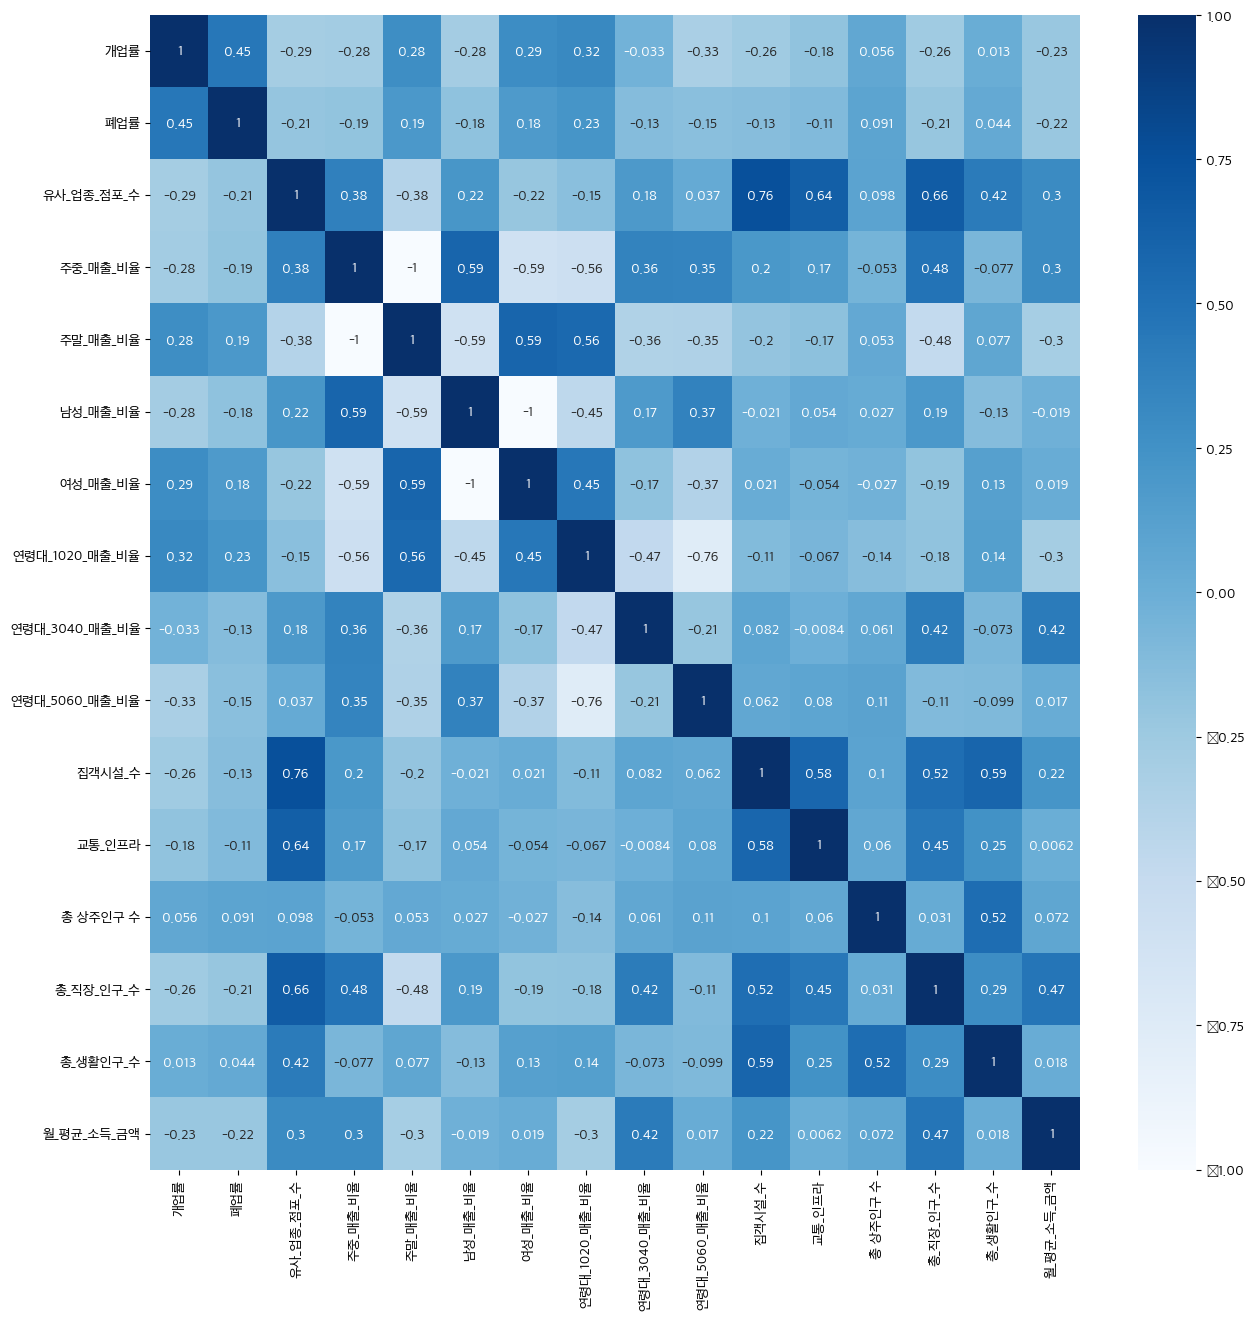

In [12]:
plt.rcParams['font.family'] = font_name
plt.rcParams['font.sans-serif'] = font_name
plt.rcParams["figure.figsize"] = (15,15)
sb.heatmap(scaled_df.corr(method='pearson'),
          annot = True,
          cmap = 'Blues',
          vmin = -1, vmax = 1)

## 03. 다중선형회귀분석

[Ordinary Least Squares 가정]
+ 정규성: 종속변수가 정규분포를 따른다면, 잔차 또한 정규분포를 따르며 평균은 0이다.
+ 독립성: 종속변수는 서로 독립적이어야 한다.
+ 선형성: 종속변수와 독립변수가 선형관계에 있다면, 잔차와 예측치 사이에 어떤 체계적인 관계가 있으면 안 된다.
+ 등분산성:
+ 다중공선성: 독립변수 간 선형관계가 있으면 안 된다.
+ 이외에도 이상치 제거 등이 필요하다.

[가정 충족 여부 확인]('https://ysyblog.tistory.com/120')

In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:.2f}'.format

#### 1) 독립변수와 종속변수 간 관계 파악
대부분의 독립변수가 종속변수와 선형관계를 가지지 않음. 둥근 형태의 분포를 띄기 때문에 선형회귀분석의 선형성이라는 가정을 만족하지 못해 다른 분석 방법을 시도해야 함

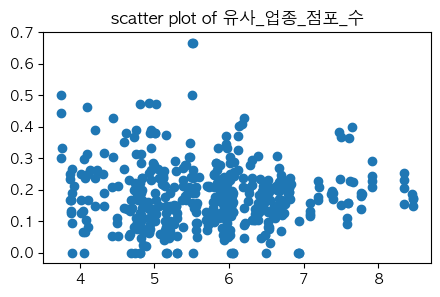

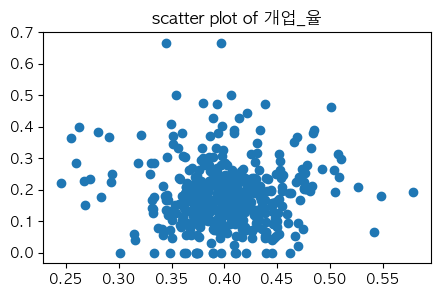

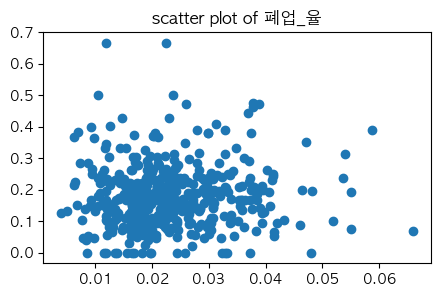

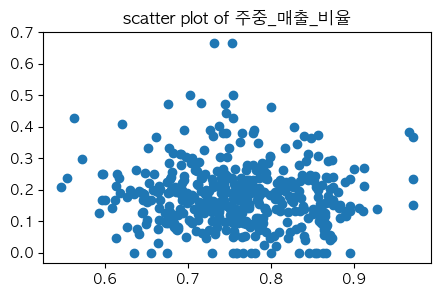

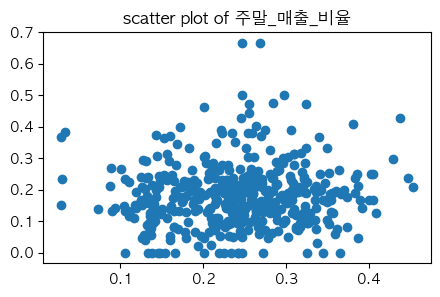

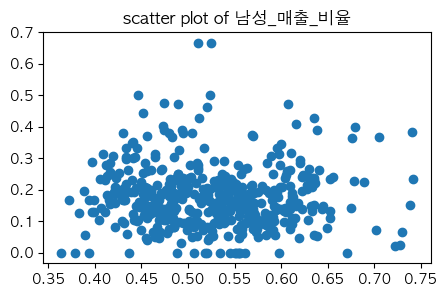

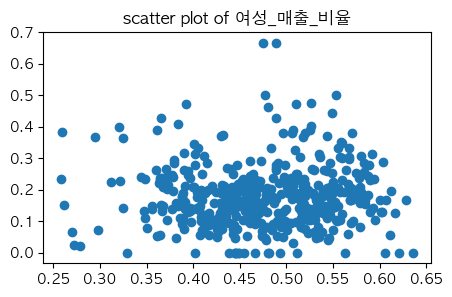

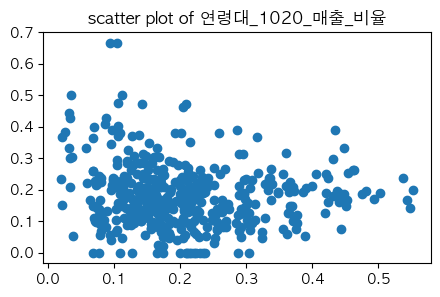

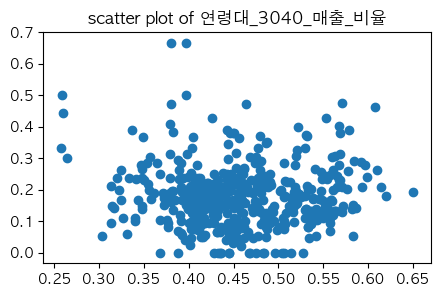

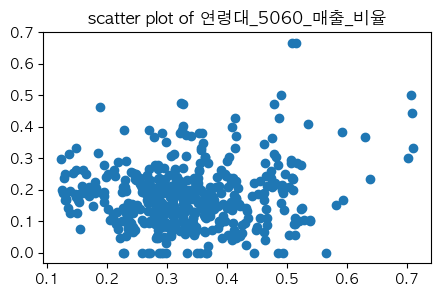

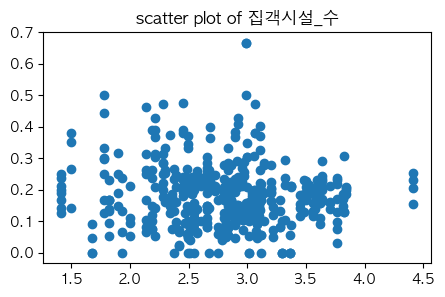

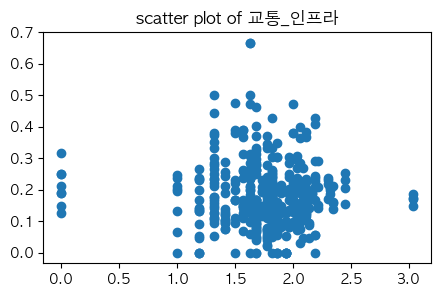

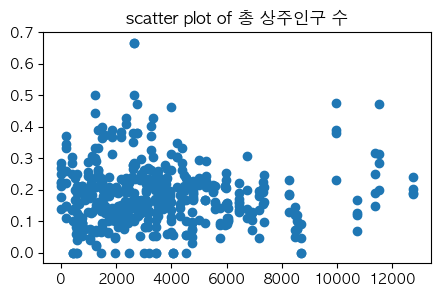

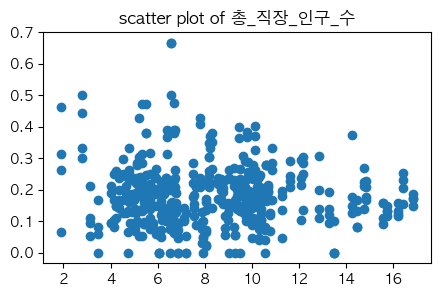

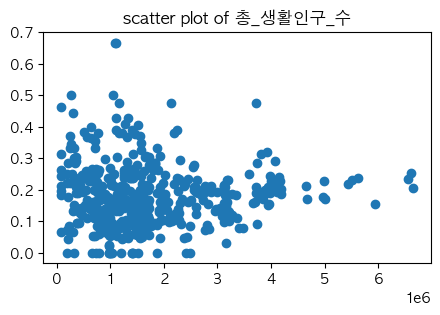

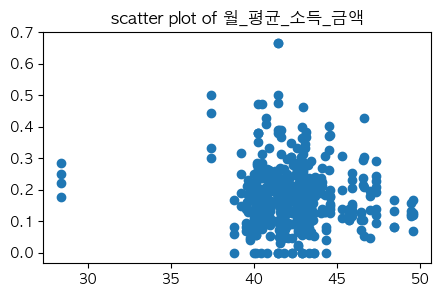

In [35]:
independent_vars = sqrt_df.drop(['경영_위기_비율'], axis=1).columns.tolist()
dependent_var = sqrt_df['경영_위기_비율']

for var in independent_vars:
    plt.figure(figsize=(5, 3))
    plt.scatter(sqrt_df[var], dependent_var)
    plt.title(f'scatter plot of {var}')
    plt.show()

#### 2) 분석 성능 향상

In [28]:
# 분석 성능 향상 1. scaling
# 효과 없음
scaler = MinMaxScaler()
scaler.fit(final_df)
scaled_values = scaler.transform(final_df)

scaled_df = pd.DataFrame(scaled_values, columns=final_df.columns)

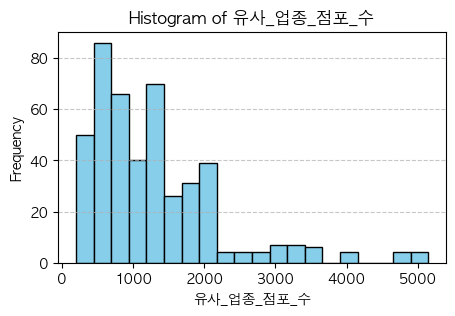

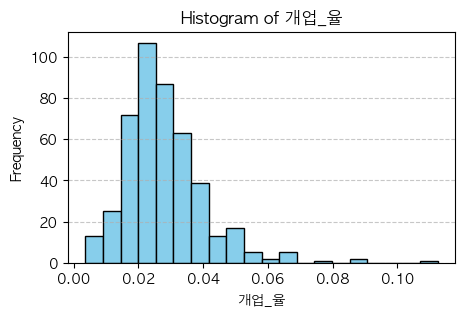

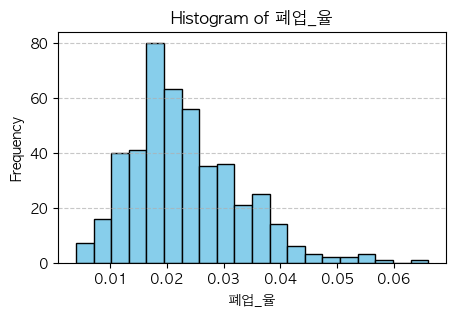

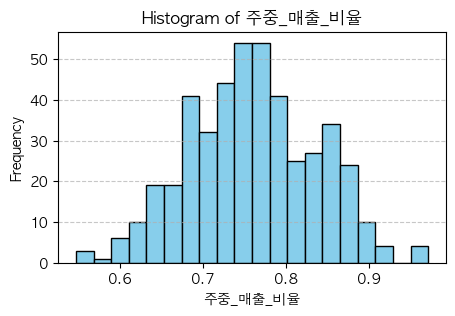

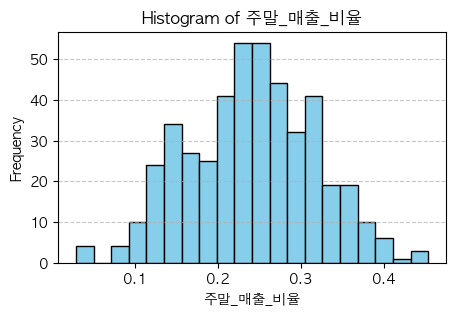

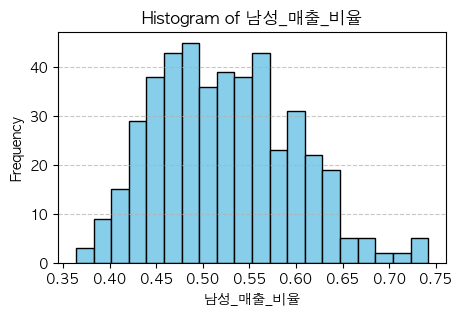

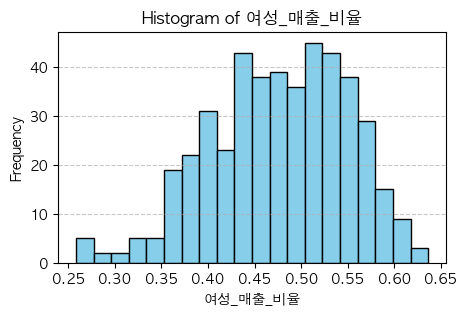

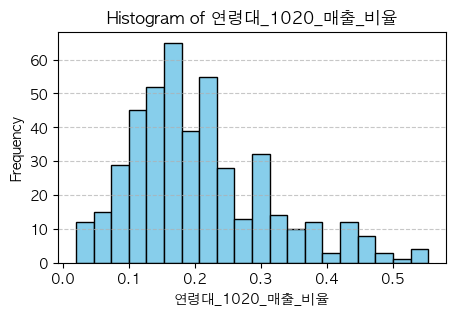

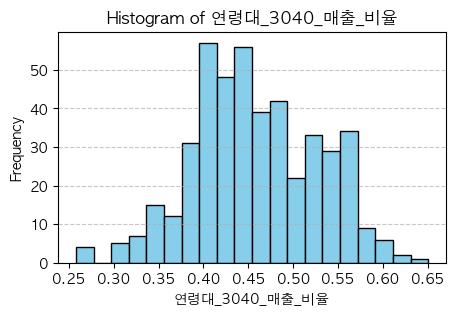

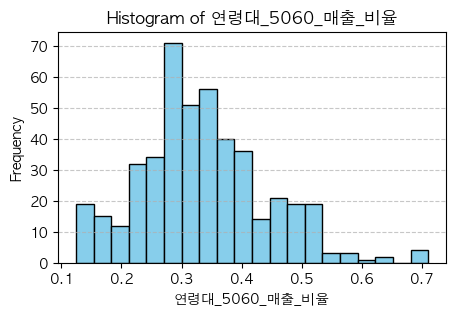

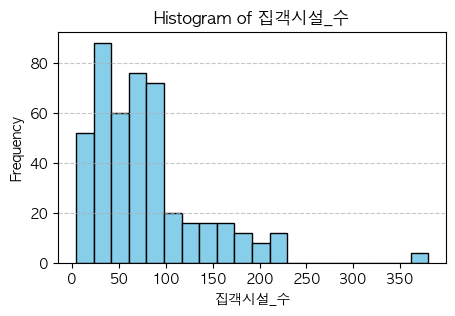

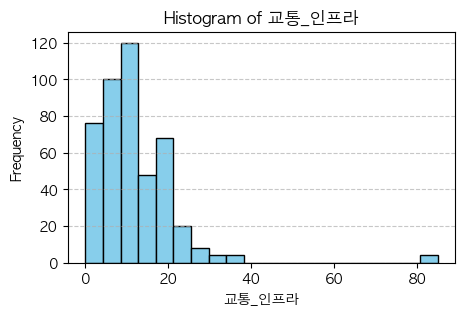

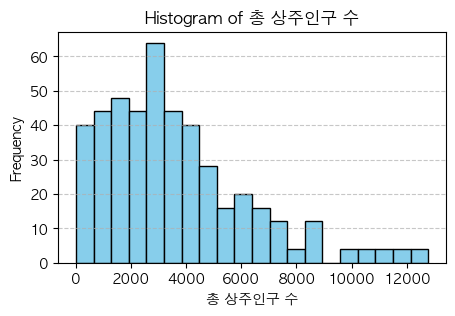

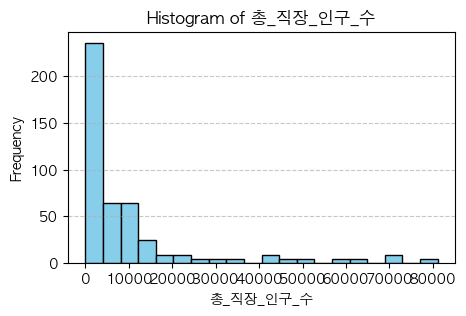

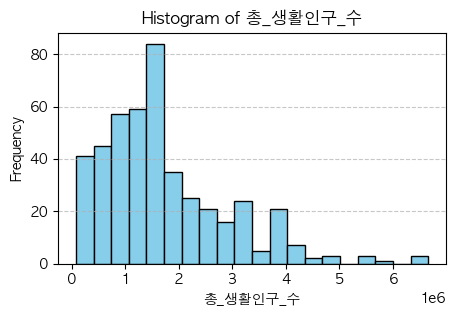

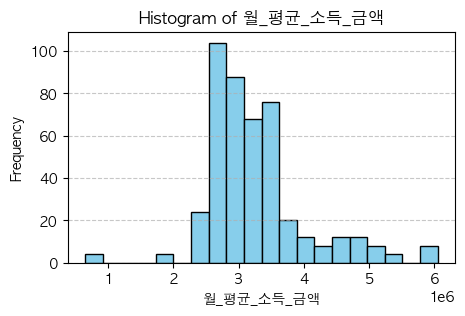

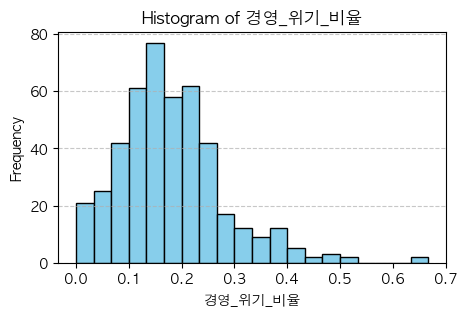

In [29]:
# 분석 성능 향상 2. 데이터 분포 확인
# 유사 업종 점포 수, 집객시설 수, 교통 인프라, 총 직장 인구, 월 평균 소득 금액 정규 분포 X
# 총 상주 인구는 스케일링?
# 이상치가 꽤 있어서 이상치 처리 필요!! (종속변수 포함)

for column in final_df.columns:
    plt.figure(figsize=(5, 3))
    plt.hist(final_df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

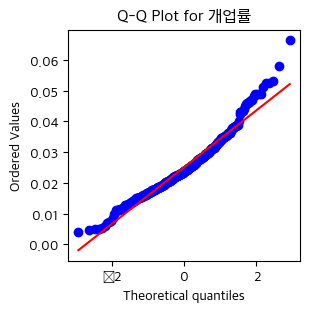

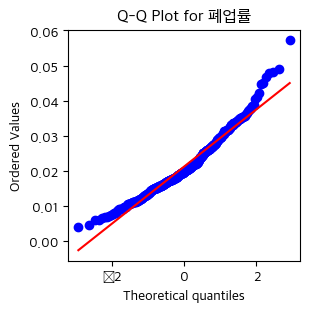

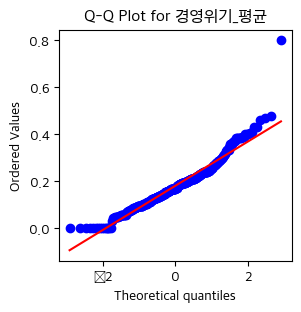

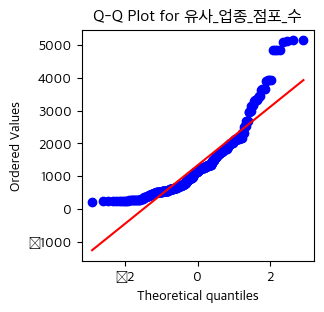

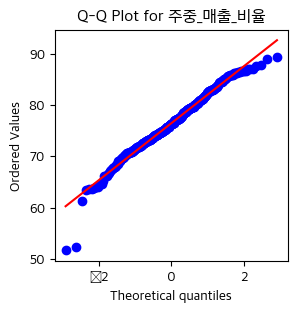

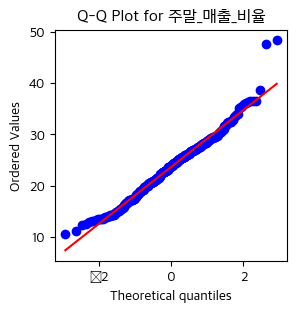

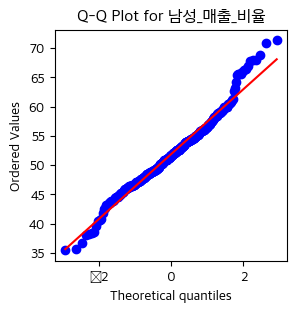

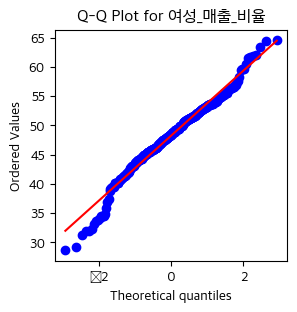

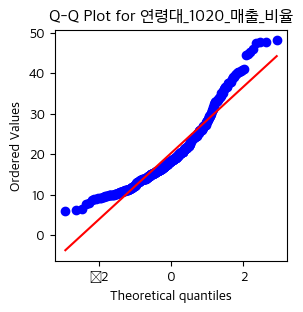

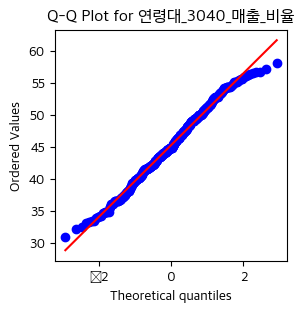

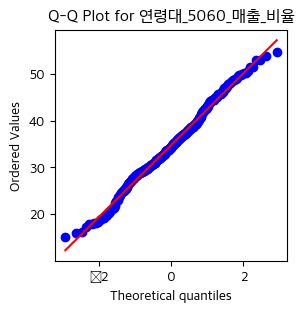

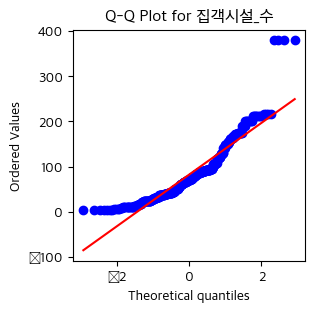

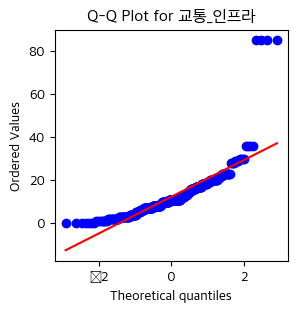

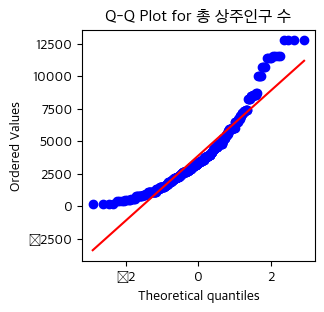

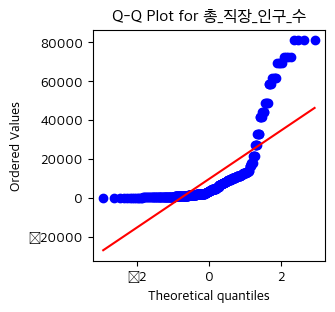

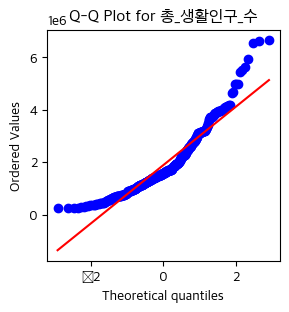

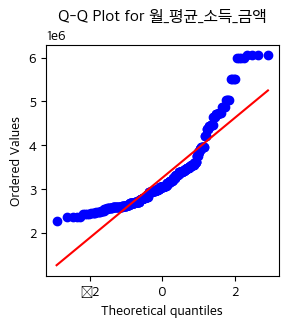

In [119]:
# 분석 성능 향상 3. 데이터 정규성 확인(Q-Q plot)
# 유사 업종 점포 수, 집객 시설 수, 교통 인프라, 총 직장 인구 수, 월 평균 소득 금액 정규 분포 X
# 연령대 1020 매출 비율, 총 상주인구 수, 총 생활인구 수 애매..
import scipy.stats as stats

for variable in final_df.columns:

    data = final_df[variable]

    plt.figure(figsize=(3, 3))
    
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {variable}")
    plt.show()

In [34]:
# 분석 성능 향상 4. 제곱근 변환
# 유사 업종 점포 수, 집객 시설 수, 교통 인프라, 총 직장 인구 수, 월 평균 소득 금액 > 제곱근 변환
# 후진제거법에서 총 직장 인구 수가 빠지고, ['연령대_1020_매출_비율', '집객시설_수', '총_생활인구_수']만 남음

sqrt_df = final_df
sqrt_variables = ['유사_업종_점포_수', '개업_율', '집객시설_수', '교통_인프라', '총_직장_인구_수', '월_평균_소득_금액']
for var in sqrt_variables:
    sqrt_df[var] = sqrt_df[var].apply(lambda x: np.sqrt(x) if x > 0 else x)

In [135]:
# 분석 성능 향상 5. 로그 변환
# 유사 업종 점포 수, 집객 시설 수, 교통 인프라, 총 직장 인구 수, 월 평균 소득 금액 > 로그 변환

log_df = final_df
log_variables = ['유사_업종_점포_수', '집객시설_수', '교통_인프라', '총_직장_인구_수', '월_평균_소득_금액']
log_df[log_variables] = log_df[log_variables].apply(np.log)
# log_df

#### 3.1) 모든 변수

In [24]:
x1 = final_df.drop('경영위기_평균', axis=1)
y1 = final_df['경영위기_평균']

lr = sm.OLS(y1, x1)
result1 = lr.fit()

In [25]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                경영위기_평균   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              87.38
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                   1.80e-116
Time:                        16:47:33   Log-Likelihood:                          374.00
No. Observations:                 396   AIC:                                     -716.0
Df Residuals:                     380   BIC:                                     -652.3
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
개업률                0.3821      0.644      0.593      0.553      -0.884       1.648
폐업률                0.4744      0.668      0.711      0.478      -0.838       1.787
유사_업종_점포_수      2.266e-05   9.98e-06      2.270      0.024    3.03e-06    4.23e-05
주중_매출_비율           0.0122      0.075      0.162      0.871      -0.136       0.160
주말_매출_비율           0.0134      0.075      0.178      0.859      -0.135       0.162
남성_매출_비율           0.0021      0.075      0.028      0.978      -0.145       0.149
여성_매출_비율           0.0011      0.075      0.015      0.988      -0.146       0.148
연령대_1020_매출_비율    -0.0141      0.044     -0.319      0.750      -0.101       0.073
연령대_3040_매출_비율    -0.0114      0.044     -0.258      0.796      -0.098       0.076
연령대_5060_매출_비율    -0.0131      0.044     -0.296      0.767      -0.100       0.074
집객시설_수            -0.0004      0.000     -2.518      0.012      -0.001   -8.67e-05
교통_인프라             0.0003      0.001      0.367      0.714      -0.001       0.002
총 상주인구 수       -3.917e-06   2.55e-06     -1.533      0.126   -8.94e-06    1.11e-06
총_직장_인구_수      -9.247e-07   5.06e-07     -1.829      0.068   -1.92e-06    6.95e-08
총_생활인구_수        1.743e-08   7.38e-09      2.363      0.019    2.92e-09    3.19e-08
월_평균_소득_금액     -1.413e-09   8.77e-09     -0.161      0.872   -1.87e-08    1.58e-08
==============================================================================
Omnibus:                      113.222   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.991
Skew:                           1.200   Prob(JB):                    1.30e-100
Kurtosis:                       7.703   Cond. No.                     6.12e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1["features"] = x1.columns
vif1 = vif1.sort_values("VIF Factor").reset_index(drop=True)
vif1

,VIF Factor,features
0,3.98,총_직장_인구_수
1,5.46,교통_인프라
2,6.16,총 상주인구 수
3,9.84,폐업률
4,11.07,집객시설_수
5,11.50,총_생활인구_수
6,11.51,유사_업종_점포_수
7,12.79,개업률
8,36.87,월_평균_소득_금액
9,40497.30,연령대_1020_매출_비율


#### 3.2) 남성,여성,주중,주말(4개) 제외

In [27]:
x2 = final_df.drop(['경영위기_평균', '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율'], axis=1)
y2 = final_df['경영위기_평균']

lr = sm.OLS(y2, x2)
result2 = lr.fit()

In [29]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                경영위기_평균   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              117.3
Date:                Sat, 02 Sep 2023   Prob (F-statistic):                   2.53e-120
Time:                        16:50:31   Log-Likelihood:                          373.47
No. Observations:                 396   AIC:                                     -722.9
Df Residuals:                     384   BIC:                                     -675.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
개업률                0.3038      0.632      0.481      0.631      -0.938       1.546
폐업률                0.4425      0.663      0.667      0.505      -0.861       1.746
유사_업종_점포_수      2.314e-05   9.32e-06      2.483      0.013    4.82e-06    4.15e-05
연령대_1020_매출_비율     0.0001      0.001      0.218      0.827      -0.001       0.001
연령대_3040_매출_비율     0.0027      0.001      3.722      0.000       0.001       0.004
연령대_5060_매출_비율     0.0011      0.001      1.689      0.092      -0.000       0.002
집객시설_수            -0.0004      0.000     -2.721      0.007      -0.001      -0.000
교통_인프라             0.0003      0.001      0.370      0.712      -0.001       0.002
총 상주인구 수       -3.555e-06   2.52e-06     -1.412      0.159    -8.5e-06     1.4e-06
총_직장_인구_수      -1.001e-06    4.7e-07     -2.132      0.034   -1.92e-06   -7.81e-08
총_생활인구_수        1.746e-08    7.3e-09      2.392      0.017    3.11e-09    3.18e-08
월_평균_소득_금액     -3.231e-09   8.23e-09     -0.393      0.695   -1.94e-08    1.29e-08
==============================================================================
Omnibus:                      116.000   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.240
Skew:                           1.220   Prob(JB):                    1.57e-106
Kurtosis:                       7.855   Cond. No.                     6.09e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif2["features"] = x2.columns
vif2 = vif2.sort_values("VIF Factor").reset_index(drop=True)
vif2

,VIF Factor,features
0,3.46,총_직장_인구_수
1,5.25,교통_인프라
2,6.03,총 상주인구 수
3,9.36,연령대_1020_매출_비율
4,9.78,폐업률
5,10.11,유사_업종_점포_수
6,10.45,집객시설_수
7,11.35,총_생활인구_수
8,12.40,개업률
9,21.61,연령대_5060_매출_비율


#### 3.3) 단계별 선택법
전진선택법에서 후진소거법을 추가한 방법. 전진선택범과 후진소거법의 장단점을 보완하는 방법이라 가장 추천됨.

그러나, 전진선택법의 경우 첫번째 단계에서 변수 하나씩 단순회귀분석을 진행하여 p-value가 제일 작고 0.05 이하인 변수를 모형에 추가함. 우리가 가진 모든 변수로 단순선형회귀분석을 진행했는데, <b> 다 p-value 0.05를 넘어서 처음부터 변수를 선택하지 못하는 문제가 발생함.</b> 

<b> 따라서, 변수를 하나씩 추가해나가는 전진선택법이 아닌 변수를 하나씩 소거하는 후진소거법이 적합함. </b>

In [86]:
all_variables = final_df.drop(['경영위기_평균', '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율'], axis=1).columns.tolist()
y = final_df['경영위기_평균']

In [80]:
selected_variables = []

p_enter = 0.05
p_remove = 0.05

sv_per_step = [] # 각 스텝별로 선택된 변수들
adjusted_r_squared = [] # 각 스텝별로 수정된 결정계수
steps = []
step = 0

while len(all_variables) > 0:
    remainder = list(set(all_variables) - set(selected_variables)) # seleted_variable에 있는 원소들을 all_variable에서 제거
    pval = pd.Series(index=remainder) # 변수의 p-value

    # 기존에 포함된 변수(selected)와 새로운 변수(all) 하나씩 돌아가면서 선형 모형 적합하기
    for col in remainder:
        
        X = final_df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

        print('[' + col + ']' + "p-value: " + str(model.pvalues[col]))

    min_pval = pval.min()
    
    if min_pval < p_enter:
        
        selected_variables.append(pval.idxmin()) # p-value가 가장 낮은 index 추가

        # 선택된 변수들 중 어떤 변수를 제거할지 선택하기
        while len(selected_variables) > 0:
            selected_X = final[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sum.OLS(y, selected_X).fit().pvalues[1:] # 절편항의 p-value 제거
            max_pval = selected_pval.max()
            
            if max_pval >= p_remove:
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        step.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(final_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    
    else:
        break

[개업률]p-value: 0.2146081067542652
[총_생활인구_수]p-value: 0.3795358207955961
[연령대_1020_매출_비율]p-value: 0.46951673520633375
[유사_업종_점포_수]p-value: 0.6454192333300222
[폐업률]p-value: 0.3485156618228913
[총 상주인구 수]p-value: 0.5890319448921315
[연령대_3040_매출_비율]p-value: 0.3589850781577485
[월_평균_소득_금액]p-value: 0.3589545980512764
[교통_인프라]p-value: 0.7801319474562236
[집객시설_수]p-value: 0.3416282209378906
[총_직장_인구_수]p-value: 0.25504833043520003
[연령대_5060_매출_비율]p-value: 0.8989367195900246


#### 3.4) 후진소거법
모든 변수가 포함된 모형에서 설명력이 가장 적은 변수를 제거해나가는 방법  
구현과정이 간단하고 변수가 많은 데이터에 적용 가능하다는 장점이 있지만, 한번 제외된 변수는 다시는 모형에 포함될 수 없으며 일치성을 만족하지 않음

모든 변수의 p-value가 높게 나타나는 편이라 0.05를 기준으로 했을 땐 선택된 변수가 없었음.  
p-value의 기준으로 0.1로 상향한 결과, <b> '유사_업종_점포_수', '연령대_1020_매출_비율', '집객시설_수', '총_직장_인구_수', '총_생활인구_수' </b> 가 선택됨.

In [76]:
all_variables = final_df.drop(['경영위기_평균', '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율'], axis=1).columns.tolist()
y = final_df['경영위기_평균']

In [79]:
selected_variables = all_variables
p_remove = 0.1

sv_per_step = []
adjusted_r_squared = []
steps = []
step = 0

while len(selected_variables) > 0:
    X = sm.add_constant(sqrt_df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:]
    max_pval = p_vals.max()

    if max_pval >= p_remove:
        selected_variables.remove(p_vals.idxmax())

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(sqrt_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [80]:
selected_variables

['유사_업종_점포_수', '연령대_1020_매출_비율', '집객시설_수', '총_직장_인구_수', '총_생활인구_수']

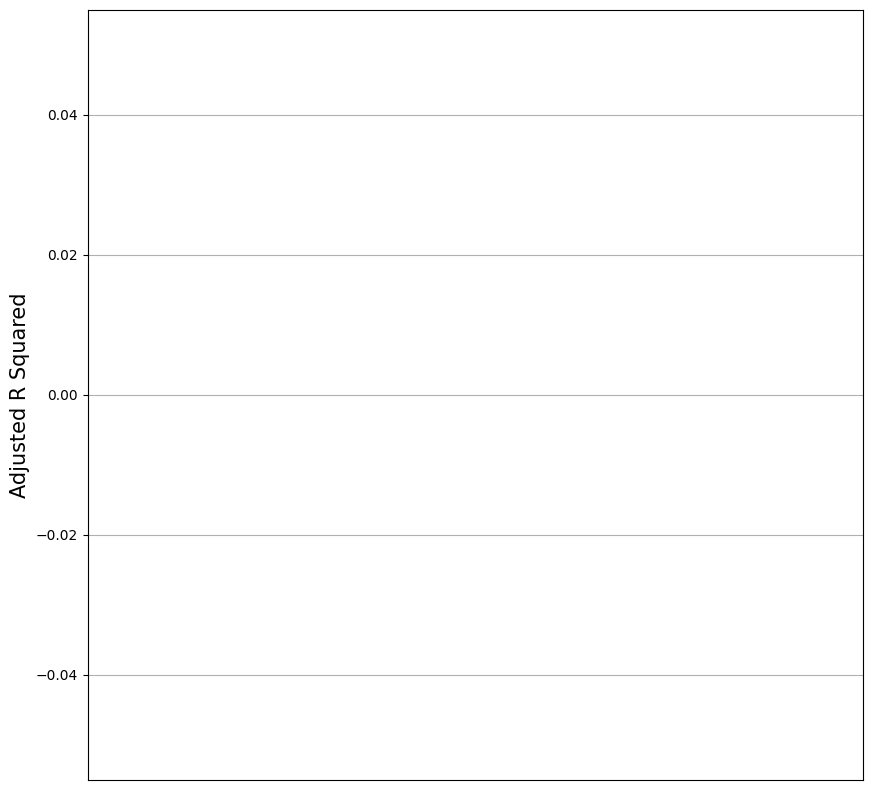

In [81]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 04. Beta regression

In [37]:
x = final_df.drop(['경영_위기_비율'], axis=1)
y = final_df['경영_위기_비율']

In [38]:
model = sm.GLM(y, x, family=sm.families.Beta())
result = model.fit()

AttributeError: module 'statsmodels.genmod.families' has no attribute 'Beta'